In [31]:
import os
os.environ["OMP_NUM_THREADS"] = "4"

import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from multiprocessing import Pool
from IPython.display import display, Math
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.ticker as tck


import scipy.stats as stats

import pandas as pd
import pickle


In [2]:
TIC = 'TIC 66818296' #WASP-17 / TIC 66818296

search_result = lk.search_lightcurve(
    target=TIC,
    mission='TESS', author='SPOC')
print("trying to download")
lc_collection = search_result.download_all()
WASP_17b_lc_sector_12 = lc_collection[0].remove_nans()
WASP_17b_lc_sector_38 = lc_collection[1].remove_nans()
print("Search done")
print(lc_collection)
lc = lc_collection.stitch(corrector_func=lambda x: x.
                          remove_nans().normalize(unit='unscaled'))
#Sector 12 and sector 38
WASP_17b_lc = lc.remove_nans()

trying to download
Search done
LightCurveCollection of 2 objects:
    0: <TessLightCurve LABEL="TIC 66818296" SECTOR=12 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    1: <TessLightCurve LABEL="TIC 66818296" SECTOR=38 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>


In [3]:
TIC = 'TIC 181949561' #WASP-39b / TIC 181949561

search_result = lk.search_lightcurve(
    target=TIC,
    mission='TESS', author='SPOC')
print("trying to download")
lc_collection = search_result.download_all()
print("Search done")
print(lc_collection)
lc = lc_collection.stitch(corrector_func=lambda x: x.
                          remove_nans().normalize(unit='unscaled'))

WASP_39b_lc = lc.remove_nans()

trying to download
Search done
LightCurveCollection of 1 objects:
    0: <TessLightCurve LABEL="TIC 181949561" SECTOR=51 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>


In [4]:
filename = r"C:\Users\Student\OneDrive\MSci project\MSci2022_TESS\Transit_fitting\WASP_17b\gp_batman_model\WASP_17b_model_flux_sigma.p"

with open(filename, "rb") as f:
    WASP_17b_model_flux, sigma = pickle.load(f)
f.close()

In [10]:
filename = r"C:\Users\Student\OneDrive\MSci project\MSci2022_TESS\Transit_fitting\WASP_39b\gp_batman_model\WASP_39b_model_flux.p"

with open(filename, "rb") as f:
    t, WASP_39b_model_flux = pickle.load(f)
f.close()

In [27]:
filename = r"C:\Users\Student\OneDrive\MSci project\MSci2022_TESS\Transit_fitting\WASP_17b\gp_batman_model\WASP_17b_residuals_gp_batman_w_flux.p"

with open(filename, "rb") as f:
    WASP_17b_t, WASP_17b_residuals = pickle.load(f)
f.close()

In [28]:
filename = r"C:\Users\Student\OneDrive\MSci project\MSci2022_TESS\Transit_fitting\WASP_39b\gp_batman_model\WASP_39b_residuals_gp_batman_w_flux.p"

with open(filename, "rb") as f:
    WASP_39b_t, WASP_39b_residuals = pickle.load(f)
f.close()

In [30]:
WASP_17b_residuals_mean = np.mean(WASP_17b_residuals)
WASP_17b_residuals_sigma = np.std(WASP_17b_residuals)

WASP_39b_residuals_mean = np.mean(WASP_39b_residuals)
WASP_39b_residuals_sigma = np.std(WASP_39b_residuals)

x = np.linspace(-0.014, 0.014, 1000)

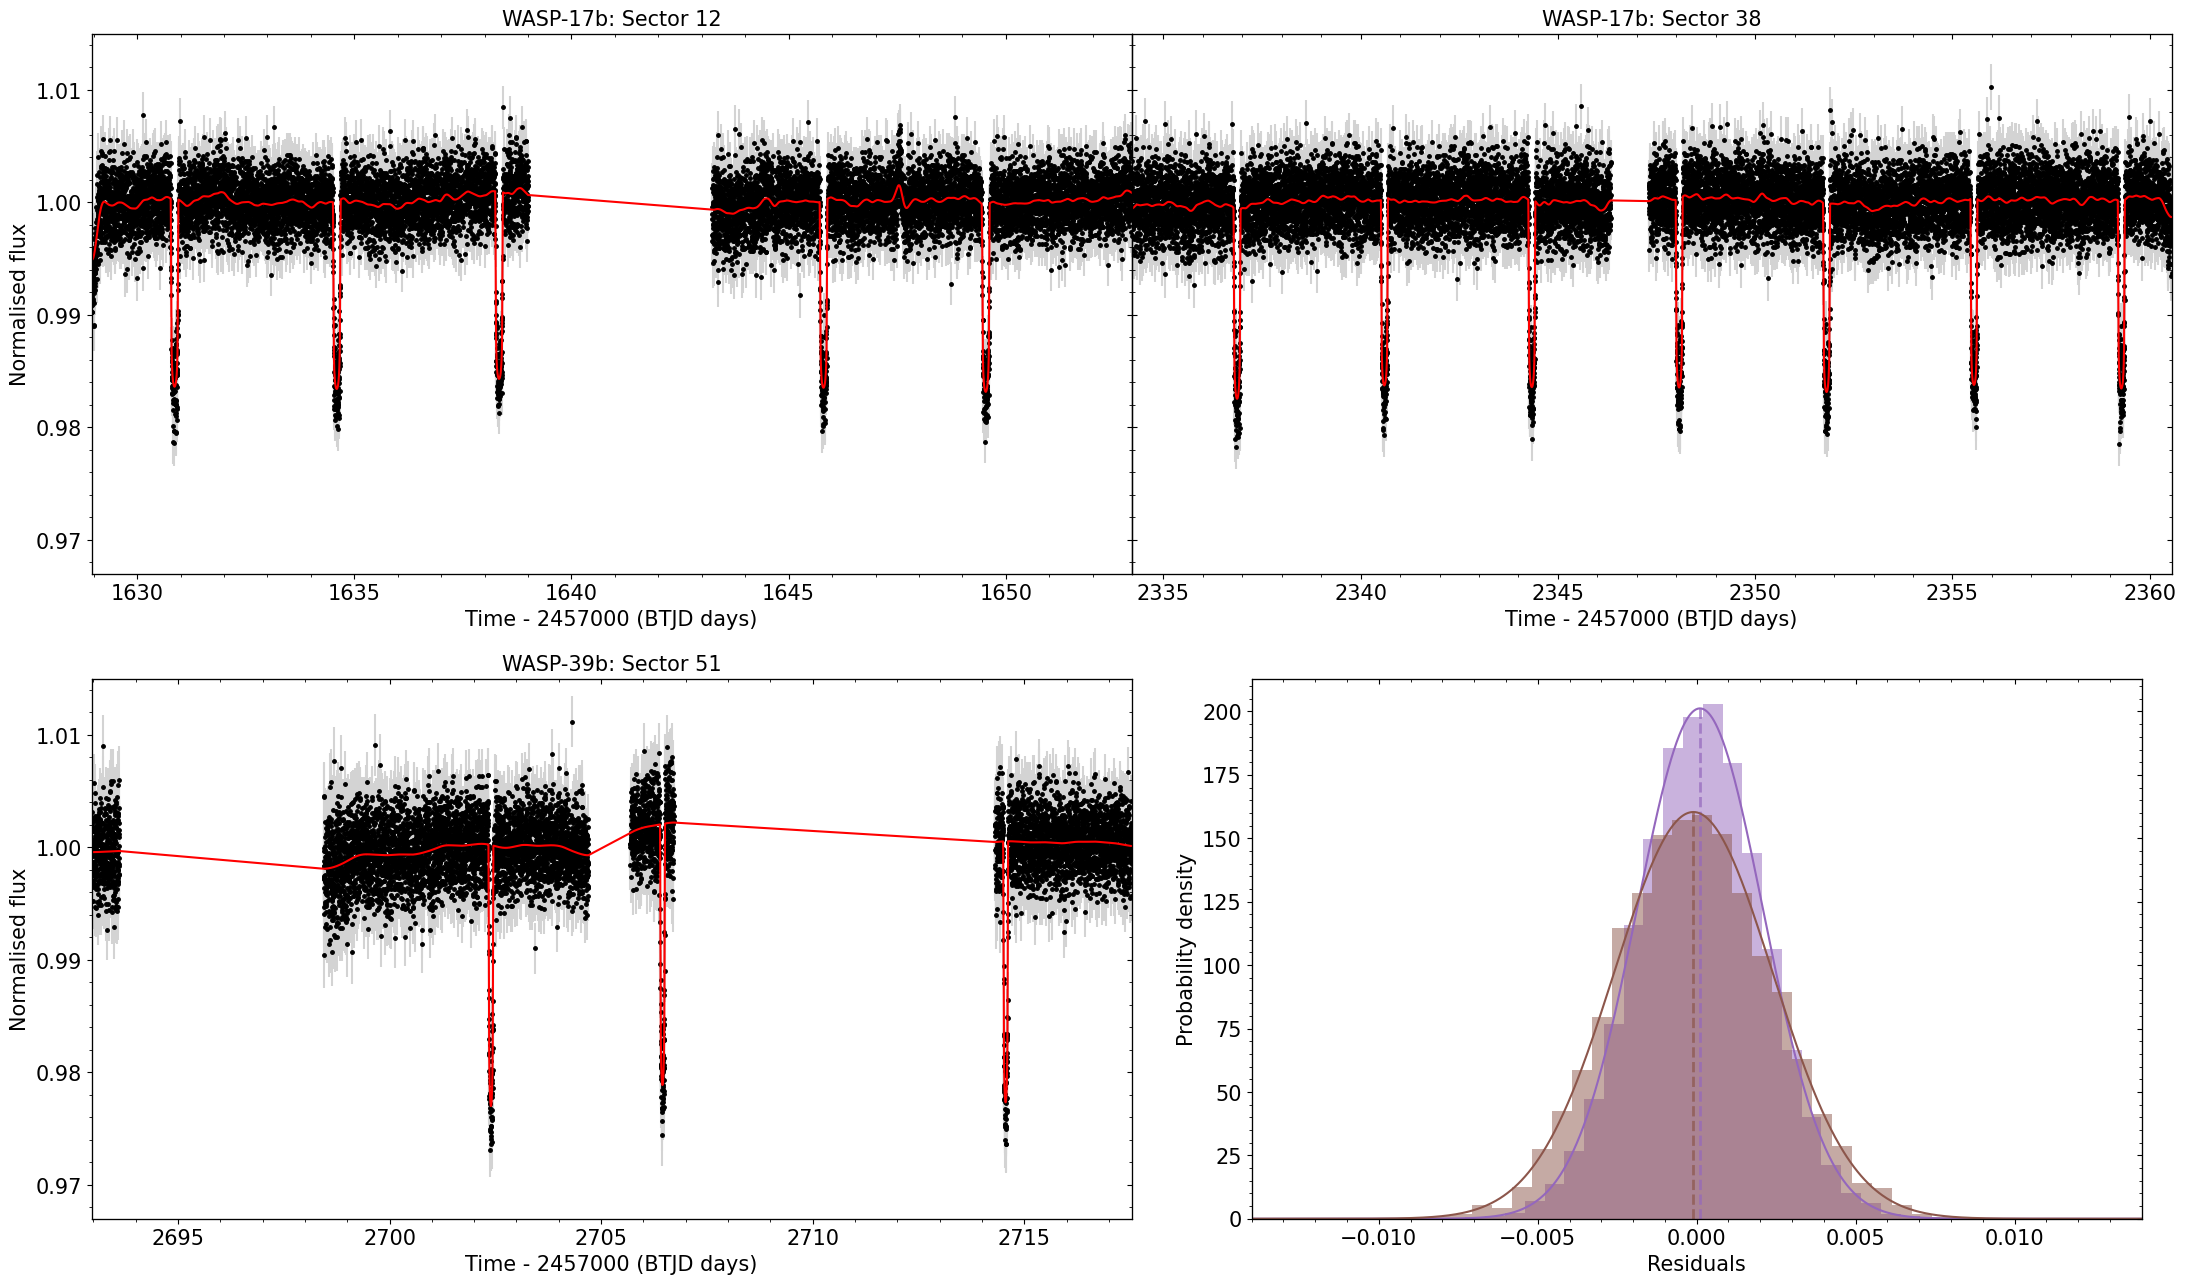

In [48]:
#Physical model only

fontsize = 15

#Panel settings
left = 0.1
bottom = 0.1
width = 0.65
height = 0.9
spacing = -height -1.075
w_spacing = 0.075

rect1 = [left, bottom, width, height]
rect2 = [left+width, bottom, width, height]
rect3 = [left, bottom+height+spacing, width, height]
rect4 = [left+width+w_spacing, bottom+height+spacing, width-1.25*w_spacing, height]


fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_axes(rect1)
ax2 = fig.add_axes(rect2)

ax3 = fig.add_axes(rect3)
ax4 = fig.add_axes(rect4)

"""
WASP-17b Sector 12
"""
ax1.set_title("WASP-17b: Sector 12", size=fontsize)
ax1.errorbar(np.array(WASP_17b_lc.time.btjd), np.array(WASP_17b_lc.flux), yerr=np.array(WASP_17b_lc.flux_err), fmt='.', markersize=5, color='black', ecolor='LightGrey', label="Data", zorder=0) #Black
ax1.plot(np.array(WASP_17b_lc.time.btjd), WASP_17b_model_flux, color='Red', zorder=10)
ax1.set_xlim(min(WASP_17b_lc_sector_12.time.btjd), max(WASP_17b_lc_sector_12.time.btjd))
ax1.set_ylim([0.967, 1.015])
ax1.set_xlabel("Time - 2457000 (BTJD days)", size=fontsize)
ax1.set_ylabel("Normalised flux", size=fontsize)


# Mirror y
ax1y = ax1.twinx()
ax1y.set_ylim(ax1.get_ylim())
ax1y.get_yaxis().set_ticklabels([])
ax1y.tick_params(which="both", direction="in")#, labelright=True, labelleft=True)

# Mirror x
ax1x = ax1.twiny()
ax1x.set_xlim(ax1.get_xlim())
ax1x.get_xaxis().set_ticklabels([])
ax1x.tick_params(which="both", direction="in")


"""
WASP-17b Sector 38
"""
ax2.set_title("WASP-17b: Sector 38", size=fontsize)
ax2.errorbar(np.array(WASP_17b_lc.time.btjd), np.array(WASP_17b_lc.flux), yerr=np.array(WASP_17b_lc.flux_err), fmt='.', markersize=5, color='black', ecolor='LightGrey', label="Data", zorder=0) #Black
ax2.plot(np.array(WASP_17b_lc.time.btjd), WASP_17b_model_flux, color='Red', zorder=10)
ax2.set_xlim(min(WASP_17b_lc_sector_38.time.btjd), max(WASP_17b_lc_sector_38.time.btjd))
ax2.set_ylim(ax1.get_ylim()) #Mirror ax1 ylims
ax2.set_xlabel("Time - 2457000 (BTJD days)", size=fontsize)

ax2.get_yaxis().set_ticklabels([])
ax2.tick_params(axis="y",which="both", direction="in")

# Mirror y
ax2y = ax2.twinx()
ax2y.set_ylim(ax2.get_ylim())
ax2y.get_yaxis().set_ticklabels([])
ax2y.tick_params(which="both", direction="in")

# Mirror x
ax2x = ax2.twiny()
ax2x.set_xlim(ax2.get_xlim())
ax2x.get_xaxis().set_ticklabels([])
ax2x.tick_params(which="both", direction="in")


ax1.yaxis.set_tick_params(labelsize=fontsize)
ax1.xaxis.set_tick_params(labelsize=fontsize)
ax2.xaxis.set_tick_params(labelsize=fontsize)


ax1.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax1x.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax1.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax1y.yaxis.set_minor_locator(tck.AutoMinorLocator())


ax2.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax2x.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax2.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax2y.yaxis.set_minor_locator(tck.AutoMinorLocator())

"""
WASP-39b
"""
ax3.set_title("WASP-39b: Sector 51", size=fontsize)
ax3.errorbar(np.array(WASP_39b_lc.time.btjd), np.array(WASP_39b_lc.flux), yerr=np.array(WASP_39b_lc.flux_err), fmt='.', markersize=5, color='black', ecolor='LightGrey', label="Data", zorder=0) #Black
ax3.plot(np.array(WASP_39b_lc.time.btjd), WASP_39b_model_flux, color='Red', zorder=10)
ax3.set_xlim(min(WASP_39b_lc.time.btjd), max(WASP_39b_lc.time.btjd))
ax3.set_ylim(ax1.get_ylim())
ax3.set_xlabel("Time - 2457000 (BTJD days)", size=fontsize)
ax3.set_ylabel("Normalised flux", size=fontsize)

ax3.yaxis.set_tick_params(labelsize=fontsize)
ax3.xaxis.set_tick_params(labelsize=fontsize)

# Mirror y
ax3y = ax3.twinx()
ax3y.set_ylim(ax3.get_ylim())
ax3y.get_yaxis().set_ticklabels([])
ax3y.tick_params(which="both", direction="in")

# Mirror x
ax3x = ax3.twiny()
ax3x.set_xlim(ax3.get_xlim())
ax3x.get_xaxis().set_ticklabels([])
ax3x.tick_params(which="both", direction="in")

ax3.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax3x.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax3.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax3y.yaxis.set_minor_locator(tck.AutoMinorLocator())


ax3.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax3x.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax3.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax3y.yaxis.set_minor_locator(tck.AutoMinorLocator())

"""
Residuals
"""
nbin = 35
#WASP-17b
ax4.plot(x, stats.norm.pdf(x, WASP_17b_residuals_mean, WASP_17b_residuals_sigma), color='#9467bd', label="WASP-17b")
ax4.hist(WASP_17b_residuals, density=True, bins=nbin, alpha=0.5, color='#9467bd')
ax4.vlines(x=WASP_17b_residuals_mean, ymin=0, ymax=stats.norm.pdf(WASP_17b_residuals_mean, WASP_17b_residuals_mean, WASP_17b_residuals_sigma), colors='#9467bd', linestyles='--', alpha=0.7, linewidth=2)

#WASP-39b
ax4.plot(x, stats.norm.pdf(x, WASP_39b_residuals_mean, WASP_39b_residuals_sigma), color='#8c564b', label="WASP-39b")
ax4.hist(WASP_39b_residuals, density=True, bins=nbin, alpha=0.5, color='#8c564b')
ax4.vlines(x=WASP_39b_residuals_mean, ymin=0, ymax=stats.norm.pdf(WASP_39b_residuals_mean, WASP_39b_residuals_mean, WASP_39b_residuals_sigma), colors='#8c564b', linestyles='--', alpha=0.7, linewidth=2)

ax4.set_xlim(min(x), max(x))
ax4.set_xlabel("Residuals", size=fontsize)
ax4.set_ylabel("Probability density", size=fontsize)
ax4.xaxis.set_tick_params(labelsize=fontsize)
ax4.yaxis.set_tick_params(labelsize=fontsize)

# Mirror y
ax4y = ax4.twinx()
ax4y.set_ylim(ax4.get_ylim())
ax4y.get_yaxis().set_ticklabels([])
ax4y.tick_params(which="both", direction="in")


# Mirror x
ax4x = ax4.twiny()
ax4x.set_xlim(ax4.get_xlim())
ax4x.get_xaxis().set_ticklabels([])
ax4x.tick_params(which="both", direction="in")

ax4.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax4x.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax4.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax4y.yaxis.set_minor_locator(ticker.AutoMinorLocator())

plt.show()